<a href="https://colab.research.google.com/github/AndryADSM/Asset-Analyzer/blob/main/asset_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 Asset Analyzer
## Project in progress!
My Website: https://aadsm2355.wixsite.com/andryadsm

# Set up

In [70]:
# !pip install yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

```
(
    tickers:     Unknown,
    period:      str            = "max",
    interval:    str            = "1d",
    start:       Unknown | None = None,
    end:         Unknown | None = None,
    group_by:    str            = 'column',
    prepost:     bool           = False,
    auto_adjust: bool           = False,
    repair:      bool           = False,
    keepna:      bool           = False,
    actions:     bool           = False,
    threads:     bool           = True,
    ignore_tz:   Unknown | None = None,
    proxy:       Unknown | None = None,
    rounding:    bool           = False,
    show_errors: Unknown | None = None,
    timeout:     int            = 10,
    session:     Unknown | None = None
    back_adjust: bool           = False,
    progress:    bool           = True,
 ) -> Unknown

Download yahoo tickers
:Parameters:
    tickers:     str, list
        List of tickers to download
    period:      str
        Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        Either Use period parameter or use start and end
    interval:    str
        Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        Intraday data cannot extend last 60 days
    start:       str
        Download start date string (YYYY-MM-DD) or _datetime, inclusive.
        Default is 99 years ago
        E.g. for start="2020-01-01", the first data point will be on "2020-01-01"
    end:         str
        Download end date string (YYYY-MM-DD) or _datetime, exclusive.
        Default is now
        E.g. for end="2023-01-01", the last data point will be on "2022-12-31"
    group_by:    str
        Group by 'ticker' or 'column' (default)
    prepost:     bool
        Include Pre and Post market data in results?
        Default is False
    auto_adjust: bool
        Adjust all OHLC automatically? Default is False
    repair:      bool
        Detect currency unit 100x mixups and attempt repair
        Default is False
    keepna:      bool
        Keep NaN rows returned by Yahoo?
        Default is False
    actions:     bool
        Download dividend + stock splits data. Default is False
    threads:     bool / int
        How many threads to use for mass downloading. Default is True
    ignore_tz:   bool
        When combining from different timezones, ignore that part of datetime.
        Default depends on interval. Intraday = False. Day+ = True.
    proxy:       str
        Optional. Proxy server URL scheme. Default is None
    rounding:    bool
        Optional. Round values to 2 decimal places?
    show_errors: bool
        Optional. Doesn't print errors if False
        DEPRECATED, will be removed in future version
    timeout:     None or float
        If not None stops waiting for a response after given number of
        seconds. (Can also be a fraction of a second e.g. 0.01)
    session:     None or Session
        Optional. Pass your own session object to be used for all requests
```



In [110]:
def download_data(
    tickers:     list[str],
    start:       str  = '1900-01-01',
    end:         str  = '2100-01-01',
    interval:    str  = '1d',
    *,
    actions:     bool = False,
    auto_adjust: bool = False
) -> pd.DataFrame:

    """
    Downloads data from Yahoo Finance, gets the weekday number and name and creates columns of normalized prices
    ### Params
    tickers:     str, list
        List of tickers to download
    interval:    str
        Valid intervals: '1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo' or '3mo'
        intraday data cannot extend last 60 days
        except '60m' or '1h' which can be up to 730 days (1.5 years)
        and '1m' which only can be up to 7 days (1 week)

    #### Returns DataFrame
    """

    data = yf.download(tickers, start=start, end=end, group_by='ticker', interval=interval, actions=actions, auto_adjust=auto_adjust)

    if len(tickers) == 1:
        data.columns = pd.MultiIndex.from_product([tickers, data.columns], names=['Ticker', 'Price'])
    return data[tickers]

tickers = ['SPY', 'AAPL', 'TSLA', 'KO']#, 'DIS', 'BAC', 'XOM', 'GLD', 'CMG', 'USO', 'META']
# ['SPY', 'AAPL', 'META', 'GOOGL', 'MSFT', 'NFLX', 'DIS', 'AMZN', 'TSLA', 'MRNA', 'CMG', 'AMD', 'NVDA', 'BAC', 'XOM', 'CVX', 'USO', 'SLV', 'GLD']
data = download_data(tickers, '2024-04-24', '2024-05-01', interval='1d')
data

[*********************100%%**********************]  4 of 4 completed


Ticker             SPY                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2024-04-24  506.559998  507.369995  503.130005  505.410004  505.410004   
2024-04-25  499.179993  504.269989  497.489990  503.489990  503.489990   
2024-04-26  506.350006  509.880005  505.700012  508.260010  508.260010   
2024-04-29  510.089996  510.750000  507.250000  510.059998  510.059998   
2024-04-30  508.559998  509.559998  501.980011  501.980011  501.980011   

Ticker                      AAPL                                      ...  \
Price         Volume        Open        High         Low       Close  ...   
Date                                                                  ...   
2024-04-24  55928100  166.539993  169.300003  166.210007  169.020004  ...   
2024-04-25  69122400  169.529999  170.610001  168.149994  169.889999  ...   
2024-04-26  64306100  169.880005  171.339996  169.179993  169.300003  ...   
2024-04-29  46415400  173.369995  176.029999  173.100006  173.500000  ...   
2024-04-30  77483600  173.330002  174.990005  170.000000  170.330002  ...   

Ticker            TSLA                                            KO  \
Price              Low       Close   Adj Close     Volume       Open   
Date                                                                   
2024-04-24  157.509995  162.130005  162.130005  181178000  60.320000   
2024-04-25  158.360001  170.179993  170.179993  126427500  61.869999   
2024-04-26  166.369995  168.289993  168.289993  109815700  61.549999   
2024-04-29  184.539993  194.050003  194.050003  243869700  61.919998   
2024-04-30  182.839996  183.279999  183.279999  127031800  62.139999   

Ticker                                                            
Price            High        Low      Close  Adj Close    Volume  
Date                                                              
2024-04-24  61.650002  59.840000  61.549999  61.549999  19548300  
2024-04-25  62.590000  61.369999  61.740002  61.740002  19048500  
2024-04-26  61.930000  61.349998  61.740002  61.740002  10994300  
2024-04-29  62.049999  61.529999  62.040001  62.040001  13409300  
2024-04-30  62.830002  61.470001  61.770000  61.770000  19349200  

[5 rows x 24 columns]

# Get dataframes - needs mod for diff intervals

In [72]:
def get_pct_returns(
    data:      pd.DataFrame,
    *,
    round_val: int  = 6,
    as_pct:    bool = True
) -> pd.DataFrame:

    """
    Percentage return in different time frames

    ### Params
    data: pd.DataFrame
        takes unmodified data
    as_pct: bool=True
        if True values are expressed as percentages (e.g. 1.23 (%)), if False as decimals (e.g. 0.0123)
    """

    returns = pd.DataFrame(index=data.index, columns=pd.MultiIndex.from_product([[], []], names=['Ticker', 'TimeFrame']))

    for tk in data.columns.get_level_values(0).unique():
        # Intraday, open to close
        returns[tk, 'Intraday_ret'] = (data[tk, 'Close'] - data[tk, 'Open']) / data[tk, 'Open'] * 100
        # Overnight, close of previous day and todays open
        returns[tk, 'Overnight_ret'] = (data[tk, 'Open'] - data[tk, 'Close'].shift(1)) / data[tk, 'Close'].shift(1) * 100
        # Daily, close to close
        returns[tk, 'Daily_ret'] = data[tk, 'Close'].pct_change() * 100
        # Weekly and 2-3-4-week, 5 days apart per week close to close
        for week, shift in [(i, i * 5) for i in range(1, 5)]:
            returns[tk, f'{week}week_ret'] = (data[tk, 'Close'] - data[tk, 'Close'].shift(shift)) / data[tk, 'Close'].shift(shift) * 100

    returns = returns.round(round_val)

    # Turn percentage into decimal
    if as_pct == False:
        returns /= 100

    return returns

returns = get_pct_returns(data)
returns.head(10)

Ticker              SPY                                               \
TimeFrame  Intraday_ret Overnight_ret Daily_ret  1week_ret 2week_ret   
Date                                                                   
2023-01-01     5.752274           NaN       NaN        NaN       NaN   
2023-02-01    -2.208727     -0.312443 -2.514269        NaN       NaN   
2023-03-01     3.535573     -0.214507  3.313482        NaN       NaN   
2023-04-01     1.731683     -0.131906  1.597493        NaN       NaN   
2023-05-01     0.572846     -0.110593  0.461619        NaN       NaN   
2023-06-01     6.025019      0.057435  6.085914   9.053333       NaN   
2023-07-01     3.357264     -0.081209  3.273328  15.527683       NaN   
2023-08-01    -1.297474     -0.332034 -1.625200  10.005127       NaN   
2023-09-01    -5.668955      0.626181 -5.078271   2.776914       NaN   
2023-10-01    -1.973649     -0.201183 -2.170861   0.083764       NaN   

Ticker                                 AAPL                           ...  \
TimeFrame  3week_ret 4week_ret Intraday_ret Overnight_ret  Daily_ret  ...   
Date                                                                  ...   
2023-01-01       NaN       NaN    10.753757           NaN        NaN  ...   
2023-02-01       NaN       NaN     2.389388     -0.221770   2.162319  ...   
2023-03-01       NaN       NaN    12.306744     -0.393462  11.864860  ...   
2023-04-01       NaN       NaN     3.293351     -0.382043   2.898726  ...   
2023-05-01       NaN       NaN     4.708177     -0.235734   4.461344  ...   
2023-06-01       NaN       NaN     9.155883      0.253877   9.433005  ...   
2023-07-01       NaN       NaN     1.377850     -0.097955   1.278546  ...   
2023-08-01       NaN       NaN    -4.265191     -0.106893  -4.367525  ...   
2023-09-01       NaN       NaN    -9.646946      0.862304  -8.867828  ...   
2023-10-01       NaN       NaN    -0.262818      0.005838  -0.256996  ...   

Ticker          TSLA                               KO                          \
TimeFrame  2week_ret 3week_ret 4week_ret Intraday_ret Overnight_ret Daily_ret   
Date                                                                            
2023-01-01       NaN       NaN       NaN    -3.524232           NaN       NaN   
2023-02-01       NaN       NaN       NaN    -2.666014     -0.293543 -2.951731   
2023-03-01       NaN       NaN       NaN     4.904444     -0.638544  4.234583   
2023-04-01       NaN       NaN       NaN     2.969506      0.435274  3.417706   
2023-05-01       NaN       NaN       NaN    -6.999223      0.000000 -6.999223   
2023-06-01       NaN       NaN       NaN     0.467138      0.469324  0.938655   
2023-07-01       NaN       NaN       NaN     2.873753     -0.033212  2.839587   
2023-08-01       NaN       NaN       NaN    -3.639875      0.258356 -3.390923   
2023-09-01       NaN       NaN       NaN    -6.700001      0.284135 -6.434903   
2023-10-01       NaN       NaN       NaN     1.037385     -0.125044  0.911043   

Ticker                                               
TimeFrame   1week_ret 2week_ret 3week_ret 4week_ret  
Date                                                 
2023-01-01        NaN       NaN       NaN       NaN  
2023-02-01        NaN       NaN       NaN       NaN  
2023-03-01        NaN       NaN       NaN       NaN  
2023-04-01        NaN       NaN       NaN       NaN  
2023-05-01        NaN       NaN       NaN       NaN  
2023-06-01  -1.793866       NaN       NaN       NaN  
2023-07-01   4.066547       NaN       NaN       NaN  
2023-08-01  -3.546666       NaN       NaN       NaN  
2023-09-01 -12.735778       NaN       NaN       NaN  
2023-10-01  -5.313440       NaN       NaN       NaN  

[10 rows x 28 columns]

In [73]:
def get_insights(
    returns:    pd.DataFrame,
    *,
    volatility: bool = True,
    mean:       bool = True,
    mean_abs:   bool = True,
    order_by:   str  = 'ins'
) -> pd.DataFrame:

    """
    Getting useful insights
    ### Params
    order_by: str='ins'
        If 'ins' it will order by insights, if 'ret' by return.
    """

    insights = pd.DataFrame(columns=pd.MultiIndex.from_product([[], []], names=['Insight', 'Return']))
    tks = returns.columns.get_level_values(0).unique()
    ret = returns.columns.get_level_values(1).unique()

    if order_by == 'ins':
        # Volatility
        if volatility:
            for col in ret:
                insights['Volatility', f'{col.split("_")[0]}'] = {tk: (returns[tk, col].std()) for tk in tks}
        # Include mean of values
        if mean:
            for col in ret:
                insights['Mean', f'{col.split("_")[0]}'] = {tk: returns[tk, col].mean() for tk in tks}
        # Include mean of absolute values
        if mean_abs:
            for col in ret:
                insights['Mean_abs', f'{col.split("_")[0]}'] = {tk: returns[tk, col].abs().mean() for tk in tks}

    if order_by == 'ret':
        for col in ret:
            # Volatility
            if volatility:
                insights['Volatility', f'{col.split("_")[0]}'] = {tk: (returns[tk, col].std()) for tk in tks}
            # Include mean of values
            if mean:
                insights['Mean', f'{col.split("_")[0]}'] = {tk: returns[tk, col].mean() for tk in tks}
            # Include mean of absolute values
            if mean_abs:
                insights['Mean_abs', f'{col.split("_")[0]}'] = {tk: returns[tk, col].abs().mean() for tk in tks}
        insights = insights.reorder_levels(['Return', 'Insight'], axis=1)

    insights = insights.T

    return insights

insights = get_insights(returns)
insights

SPY       AAPL       TSLA        KO
Insight    Return                                              
Volatility Intraday    4.179791   6.603599  19.444943  3.980758
           Overnight   0.277412   0.359545   2.470967  0.376733
           Daily       4.200611   6.337750  16.587539  4.021377
           1week       5.397263  16.878411  26.225767  4.997896
           2week       5.422079   0.732638  12.591390  2.631888
           3week            NaN        NaN        NaN       NaN
           4week            NaN        NaN        NaN       NaN
Mean       Intraday    1.915596   3.503996   8.224972 -0.604761
           Overnight  -0.054471   0.001718  -0.268341  0.055874
           Daily       1.510992   2.836016   4.564198 -0.285891
           1week       6.319093  10.686575  20.131637 -3.874745
           2week      16.115032  31.126556  29.694857 -2.835649
           3week            NaN        NaN        NaN       NaN
           4week            NaN        NaN        NaN       NaN
Mean_abs   Intraday    3.773730   5.866488  15.700706  3.316796
           Overnight   0.222241   0.263147   1.694962  0.307008
           Daily       3.581647   5.289171  13.123405  3.309887
           1week       6.319093  12.893363  24.956518  5.036616
           2week      16.115032  31.126556  29.694857  2.835649
           3week            NaN        NaN        NaN       NaN
           4week            NaN        NaN        NaN       NaN

In [74]:
def top_results(
    insights:  pd.DataFrame,
    *,
    top:       int = 3,
    bot:       int = 3,
    round_val: int = 6
) -> None:

    """
    Display the top and bottom n results
    """

    for i in insights.index:
        display(pd.DataFrame([insights.loc[i].nlargest(top).round(round_val),
                              insights.loc[i].nsmallest(bot).round(round_val).sort_values(ascending=False)
                             ], index=[f'Top {i[0]}, {i[1]}', f'Bottom {i[0]}, {i[1]}']))

top_results(insights, top=4, bot=2, round_val=2)

,TSLA,AAPL,SPY,KO
"Top Volatility, Intraday",19.44,6.6,4.18,3.98
"Bottom Volatility, Intraday",NaN,NaN,4.18,3.98


,TSLA,KO,AAPL,SPY
"Top Volatility, Overnight",2.47,0.38,0.36,0.28
"Bottom Volatility, Overnight",NaN,NaN,0.36,0.28


,TSLA,AAPL,SPY,KO
"Top Volatility, Daily",16.59,6.34,4.2,4.02
"Bottom Volatility, Daily",NaN,NaN,4.2,4.02


,TSLA,AAPL,SPY,KO
"Top Volatility, 1week",26.23,16.88,5.4,5.0
"Bottom Volatility, 1week",NaN,NaN,5.4,5.0


,TSLA,SPY,KO,AAPL
"Top Volatility, 2week",12.59,5.42,2.63,0.73
"Bottom Volatility, 2week",NaN,NaN,2.63,0.73


,SPY,AAPL,TSLA,KO
"Top Volatility, 3week",NaN,NaN,NaN,NaN
"Bottom Volatility, 3week",NaN,NaN,NaN,NaN


,SPY,AAPL,TSLA,KO
"Top Volatility, 4week",NaN,NaN,NaN,NaN
"Bottom Volatility, 4week",NaN,NaN,NaN,NaN


,TSLA,AAPL,SPY,KO
"Top Mean, Intraday",8.22,3.5,1.92,-0.6
"Bottom Mean, Intraday",NaN,NaN,1.92,-0.6


,KO,AAPL,SPY,TSLA
"Top Mean, Overnight",0.06,0.0,-0.05,-0.27
"Bottom Mean, Overnight",NaN,NaN,-0.05,-0.27


,TSLA,AAPL,SPY,KO
"Top Mean, Daily",4.56,2.84,1.51,-0.29
"Bottom Mean, Daily",NaN,NaN,1.51,-0.29


,TSLA,AAPL,SPY,KO
"Top Mean, 1week",20.13,10.69,6.32,-3.87
"Bottom Mean, 1week",NaN,NaN,6.32,-3.87


,AAPL,TSLA,SPY,KO
"Top Mean, 2week",31.13,29.69,16.12,-2.84
"Bottom Mean, 2week",NaN,NaN,16.12,-2.84


,SPY,AAPL,TSLA,KO
"Top Mean, 3week",NaN,NaN,NaN,NaN
"Bottom Mean, 3week",NaN,NaN,NaN,NaN


,SPY,AAPL,TSLA,KO
"Top Mean, 4week",NaN,NaN,NaN,NaN
"Bottom Mean, 4week",NaN,NaN,NaN,NaN


,TSLA,AAPL,SPY,KO
"Top Mean_abs, Intraday",15.7,5.87,3.77,3.32
"Bottom Mean_abs, Intraday",NaN,NaN,3.77,3.32


,TSLA,KO,AAPL,SPY
"Top Mean_abs, Overnight",1.69,0.31,0.26,0.22
"Bottom Mean_abs, Overnight",NaN,NaN,0.26,0.22


,TSLA,AAPL,SPY,KO
"Top Mean_abs, Daily",13.12,5.29,3.58,3.31
"Bottom Mean_abs, Daily",NaN,NaN,3.58,3.31


,TSLA,AAPL,SPY,KO
"Top Mean_abs, 1week",24.96,12.89,6.32,5.04
"Bottom Mean_abs, 1week",NaN,NaN,6.32,5.04


,AAPL,TSLA,SPY,KO
"Top Mean_abs, 2week",31.13,29.69,16.12,2.84
"Bottom Mean_abs, 2week",NaN,NaN,16.12,2.84


,SPY,AAPL,TSLA,KO
"Top Mean_abs, 3week",NaN,NaN,NaN,NaN
"Bottom Mean_abs, 3week",NaN,NaN,NaN,NaN


,SPY,AAPL,TSLA,KO
"Top Mean_abs, 4week",NaN,NaN,NaN,NaN
"Bottom Mean_abs, 4week",NaN,NaN,NaN,NaN


In [75]:
def get_normalized_values(
    data:   pd.DataFrame,
    *,
    volume: bool = True
) -> pd.DataFrame:

    """
    Docs
    data: takes data with no added columns
    """

    norm_prices = pd.DataFrame(columns=pd.MultiIndex.from_product([[], []], names=['Ticker', 'Price']))
    tks = [tk for tk in data.columns.get_level_values(0).unique()]
    prices = [price for price in data.columns.get_level_values(1).unique() if price in ['Open', 'High', 'Low', 'Close', 'Adj Close']]

    # Calculate min and max price across all prices for each ticker
    min_price = {tk: data[tk][prices].min().min() for tk in tks}
    max_price = {tk: data[tk][prices].max().max() for tk in tks}

    # Normalize between 0 and 1
    for tk in tks:
        for price in prices:
            norm_prices[tk, f'{price}_norm']  = (data[tk, price]  - min_price[tk]) / (max_price[tk] - min_price[tk])
        if volume and 'Volume' in data.columns.get_level_values(1).unique():
            norm_prices[tk, 'Volume_norm'] = (data[tk, 'Volume'] - data[tk, 'Volume'].min()) / (data[tk, 'Volume'].max() - data[tk, 'Volume'].min())

    return norm_prices

data_norm = get_normalized_values(data)
data_norm

Ticker           SPY                                                \
Price      Open_norm High_norm  Low_norm Close_norm Adj Close_norm   
Date                                                                 
2023-01-01  0.065584  0.304152  0.000000   0.287305       0.213843   
2023-02-01  0.274569  0.405937  0.158544   0.184818       0.113203   
2023-03-01  0.176294  0.319595  0.028279   0.316486       0.242498   
2023-04-01  0.311071  0.382170  0.260229   0.382070       0.322532   
2023-05-01  0.377457  0.448757  0.259828   0.401324       0.341511   
2023-06-01  0.403731  0.666566  0.390694   0.656338       0.592884   
2023-07-01  0.652728  0.818392  0.593963   0.801845       0.753124   
2023-08-01  0.786603  0.796430  0.553350   0.727236       0.679307   
2023-09-01  0.755516  0.760530  0.445849   0.497894       0.452400   
2023-10-01  0.489270  0.604794  0.314681   0.404834       0.374962   
2023-11-01  0.414862  0.807160  0.409346   0.787906       0.755306   
2023-12-01  0.781588  1.000000  0.766948   0.977537       0.943586   

Ticker                      AAPL                                 ...  \
Price      Volume_norm Open_norm High_norm  Low_norm Close_norm  ...   
Date                                                             ...   
2023-01-01    0.175945  0.080981  0.305633  0.000000   0.266667  ...   
2023-02-01    0.200166  0.262425  0.440159  0.227303   0.308019  ...   
2023-03-01    1.000000  0.300331  0.541153  0.261498   0.539828  ...   
2023-04-01    0.018443  0.531478  0.605434  0.471968   0.603181  ...   
2023-05-01    0.355779  0.597879  0.731345  0.532008   0.703512  ...   
2023-06-01    0.328662  0.709476  0.931875  0.699271   0.925116  ...   
2023-07-01    0.000000  0.922598  0.981577  0.827436   0.957985  ...   
2023-08-01    0.333051  0.955202  0.961696  0.633400   0.844268  ...   
2023-09-01    0.187531  0.865739  0.872233  0.575878   0.623459  ...   
2023-10-01    0.547168  0.623592  0.770974  0.550033   0.617628  ...   
2023-11-01    0.109806  0.620676  0.911332  0.609013   0.871836  ...   
2023-12-01    0.235224  0.876872  1.000000  0.838701   0.906031  ...   

Ticker          TSLA                                              KO  \
Price       Low_norm Close_norm Adj Close_norm Volume_norm Open_norm   
Date                                                                   
2023-01-01  0.000000   0.361606       0.361606    1.000000  0.893601   
2023-02-01  0.344946   0.526129       0.526129    0.829899  0.713542   
2023-03-01  0.314462   0.534991       0.534991    0.634488  0.563988   
2023-04-01  0.256026   0.316488       0.316488    0.131373  0.799851   
2023-05-01  0.288738   0.517116       0.517116    0.241685  0.937500   
2023-06-01  0.494025   0.810006       0.810006    0.714879  0.624256   
2023-07-01  0.771268   0.838667       0.838667    0.060821  0.643601   
2023-08-01  0.559804   0.791321       0.791321    0.129130  0.784226   
2023-09-01  0.672321   0.751519       0.751519    0.090279  0.628720   
2023-10-01  0.467187   0.501468       0.501468    0.184648  0.324405   
2023-11-01  0.486328   0.700172       0.700172    0.222222  0.390625   
2023-12-01  0.640014   0.742708       0.742708    0.000000  0.500000   

Ticker                                                                
Price      High_norm  Low_norm Close_norm Adj Close_norm Volume_norm  
Date                                                                  
2023-01-01  0.905506  0.584078   0.726935       0.552297    0.306328  
2023-02-01  0.746280  0.545387   0.592262       0.422778    0.334430  
2023-03-01  0.796131  0.507441   0.779762       0.603101    0.713855  
2023-04-01  1.000000  0.767113   0.937500       0.790013    0.047887  
2023-05-01  0.977679  0.581845   0.603423       0.466258    0.497250  
2023-06-01  0.790179  0.611607   0.645089       0.506637    0.626349  
2023-07-01  0.872024  0.542411   0.772322       0.663947    0.282070  
2023-08-01  0.821429  0.614584   0.616072       0.511372    0.000000  
2023-0

# Modifiers

In [76]:
data_mod = data.copy()

In [77]:
def drop_columns(
    data: pd.DataFrame,
    drop_cols: str | list[str],
    *,
    inplace: bool = False
) -> pd.DataFrame:

    """
    Drops all the columns specified out of the second level
    """

    # To be able to input a string
    if type(drop_cols) == str:
        drop_cols =[drop_cols]

    for tk in data.columns.get_level_values(0).unique():
        for col in drop_cols:
            # To overwrite
            if inplace:
                data.drop(columns=[(tk, col)], inplace=True, errors='ignore')
            # Not to overwrite
            else:
                data = data.drop(columns=[(tk, col)], errors='ignore')

    return data

drop_columns(data_mod, 'Adj Close', inplace=True).head(3)

Ticker             SPY                                                  \
Price             Open        High         Low       Close      Volume   
Date                                                                     
2023-01-01  384.369995  408.160004  377.829987  406.480011  1575450100   
2023-02-01  405.209991  418.309998  393.640015  396.260010  1603094700   
2023-03-01  395.410004  409.700012  380.649994  409.390015  2515995800   

Ticker            AAPL                                                  \
Price             Open        High         Low       Close      Volume   
Date                                                                     
2023-01-01  130.279999  147.229996  124.169998  144.289993  1443652500   
2023-02-01  143.970001  157.380005  141.320007  147.410004  1307198900   
2023-03-01  146.830002  165.000000  143.899994  164.899994  1520266600   

Ticker            TSLA                                                  \
Price             Open        High         Low       Close      Volume   
Date                                                                     
2023-01-01  118.470001  180.679993  101.809998  173.220001  3897499400   
2023-02-01  173.889999  217.649994  169.929993  205.710007  3624845100   
2023-03-01  206.210007  207.789993  163.910004  207.460007  3311619900   

Ticker             KO                                              
Price            Open       High        Low      Close     Volume  
Date                                                               
2023-01-01  63.560001  63.720001  59.400002  61.320000  260737100  
2023-02-01  61.139999  61.580002  58.880001  59.509998  265889400  
2023-03-01  59.130001  62.250000  58.369999  62.029999  335455500

# Get date values

In [117]:
def get_datetime(
    data:   pd.DataFrame,
    get:    str,
    *,
    concat: bool = False,
    place:  str  = 'beg',
    name:   bool = False,
    num:    bool = True
) -> pd.DataFrame:

    """
    Creates a DataFrame with the number and name of the day of the week and you can concatenate it with the source DataFrame

    ### Params
    get: str
        Valid inputs are: 'minute', 'hour', 'weekday', 'day_name', 'day', 'month', 'month_name', 'quarter' or 'year'
    place: str='beg'
        'beg' or 'end'

    #### Returns DataFrame
    """

    inputs = ['minute', 'hour', 'weekday', 'day_name', 'day', 'month', 'month_name', 'quarter', 'year']
    if get not in inputs:
        raise ValueError(f'Invalid input, get=\'{get}\', valid inputs are: {inputs}')

    if concat and f'{get.capitalize()}' in data.columns.get_level_values(1).unique():
        raise Exception(f'Already a column named \'{get}\'.')

    df = pd.DataFrame(index=data.index)
    dt = data.index.to_frame().iloc[:,0].dt

    if 'name' in get:
        dt = eval(f'dt.{get}()')
    elif get == 'weekday':
        dt = dt.weekday + 1
    else:
        dt = eval(f'dt.{get}')
    df[f'{get.capitalize()}'] = dt

    if concat:
        df.columns = pd.MultiIndex.from_arrays([['Datetime'], [f'{get.capitalize()}']])
        if place == 'end':
            return pd.concat([data, df], axis=1)
        return pd.concat([df, data], axis=1)
    return df

data_mod = get_datetime(data_mod, 'month', concat=True)
data_mod

Datetime             SPY                                      \
              Month Day        Open        High         Low       Close   
Date                                                                      
2023-01-01        1   1  384.369995  408.160004  377.829987  406.480011   
2023-02-01        2   1  405.209991  418.309998  393.640015  396.260010   
2023-03-01        3   1  395.410004  409.700012  380.649994  409.390015   
2023-04-01        4   1  408.850006  415.940002  403.779999  415.929993   
2023-05-01        5   1  415.470001  422.579987  403.739990  417.850006   
2023-06-01        6   1  418.089996  444.299988  416.790009  443.279999   
2023-07-01        7   1  442.920013  459.440002  437.059998  457.790009   
2023-08-01        8   1  456.269989  457.250000  433.010010  450.350006   
2023-09-01        9   1  453.170013  453.670013  422.290009  427.480011   
2023-10-01       10   1  426.619995  438.140015  409.209991  418.200012   
2023-11-01       11   1  419.200012  458.320007  418.649994  456.399994   
2023-12-01       12   1  455.769989  477.549988  454.309998  475.309998   

                              AAPL                          ...        TSLA  \
                Volume        Open        High         Low  ...        Open   
Date                                                        ...               
2023-01-01  1575450100  130.279999  147.229996  124.169998  ...  118.470001   
2023-02-01  1603094700  143.970001  157.380005  141.320007  ...  173.889999   
2023-03-01  2515995800  146.830002  165.000000  143.899994  ...  206.210007   
2023-04-01  1395683000  164.270004  169.850006  159.779999  ...  199.910004   
2023-05-01  1780705600  169.279999  179.350006  164.309998  ...  163.169998   
2023-06-01  1749755000  177.699997  194.479996  176.929993  ...  202.589996   
2023-07-01  1374632400  193.779999  198.229996  186.600006  ...  276.489990   
2023-08-01  1754764700  196.240005  196.729996  171.960007  ...  266.260010   
2023-09-01  1588673200  189.490005  189.979996  167.619995  ...  257.260010   
2023-10-01  1999149700  171.220001  182.339996  165.669998  ...  244.809998   
2023-11-01  1499960600  171.000000  192.929993  170.119995  ...  204.039993   
2023-12-01  1643108100  190.330002  199.619995  187.449997  ...  233.139999   

                                                                   KO  \
                  High         Low       Close      Volume       Open   
Date                                                                    
2023-01-01  180.679993  101.809998  173.220001  3897499400  63.560001   
2023-02-01  217.649994  169.929993  205.710007  3624845100  61.139999   
2023-03-01  207.789993  163.910004  207.460007  3311619900  59.130001   
2023-04-01  202.690002  152.369995  164.309998  2505176300  62.299999   
2023-05-01  204.479996  158.830002  203.929993  2681994800  64.150002   
2023-06-01  276.989990  199.369995  261.769989  3440477900  59.939999   
2023-07-01  299.290009  254.119995  267.429993  2392089000  60.200001   
2023-08-01  266.470001  212.360001  258.079987  2501580900  62.090000   
2023-09-01  278.980011  234.580002  250.220001  2439306100  60.000000   
2023-10-01  268.940002  194.070007  200.839996  2590570100  55.910000   
2023-11-01  252.750000  197.850006  240.080002  2650798400  56.799999   
2023-12-01  265.130005  228.199997  248.479996  2294598400  58.270000   

                                                        
                 High        Low      Close     Volume  
Date                                                    
2023-01-01  63.720001  59.400002  61.320000  260737100  
2023-02-01  61.580002  58.880001  59.509998  265889400  
2023-03-01  62.250000  58.369999  62.029999  335455500  
2023-04-01  64.989998  61.860001  64.150002  213353000  
2023-05-01  64.690002  59.369999  59.660000  295741900  
2023-06-01  62.169998  59.770000  60.220001  319411600  
2023-07-01  63.270000  58.840000  61.930000  256289400  
2023-08-01  62.590000  59.810001 

# Plots - fix date interval display

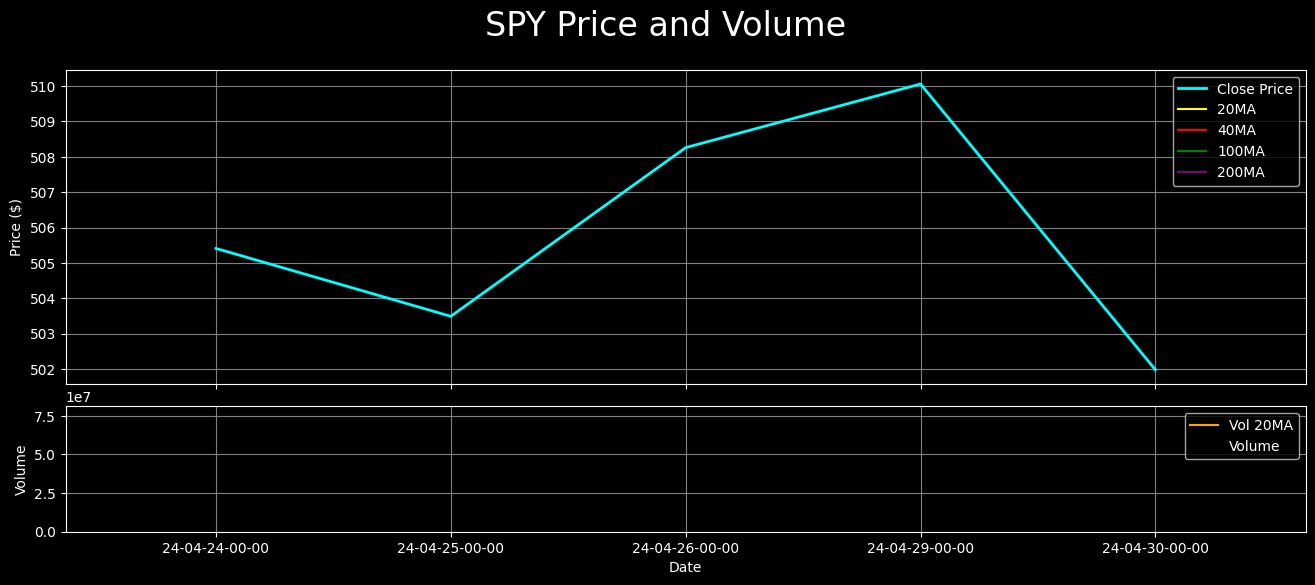

In [112]:
def plot_price_vol(
    data:       pd.DataFrame,
    ticker:     str,
    start:      str              = '1900-01-01',
    end:        str              = '2100-12-31',
    *,
    style:      str              = 'dark_background',
    figsize:    tuple[int, int]  = (16, 6),
    use_price:  str              = 'Close',
    price_clr:  str              = 'cyan',
    price_mas:  list[int] | None = [20, 40, 100, 200],
    prc_ma_clr: list[str]        = ['default'],
    volume:     bool             = True,
    bar_clr:    str              = 'default',
    volume_ma:  int | None       = 20,
    vol_ma_clr: str              = 'orange',
    legendloc:  str | None       = None
) -> None:

    """
    Plot of the price, volume and moving averages of one specified asset
    data: takes unmodified data
    """

    data_to_plot = data.loc[start:end][ticker]
    data_to_plot.index = data_to_plot.index.strftime('%y-%m-%d-%H-%M')
    data_ma = data[ticker]
    data_ma.index = data_ma.index.strftime('%y-%m-%d-%H-%M')

    # Plot
    with plt.style.context(style):
        ratio = 0
        if volume:
            ratio = 2
        fig, axs = plt.subplots(2, figsize=(figsize), height_ratios=(5, ratio), sharex=True)
        plt.suptitle(f'{ticker} Price and Volume', size=24)
        plt.subplots_adjust(hspace=0.1)

        # Price
        axs[0].plot(data_to_plot[use_price], color=price_clr, linewidth=2, zorder=len(price_mas), label=f'{use_price} Price')

        # Moving Averages
        if price_mas != None:
            if prc_ma_clr == ['default']:
                 prc_ma_clr = ['yellow', 'red', 'green', 'purple']
            for m, c, z in zip(price_mas, range(len(prc_ma_clr)+100), range(len(price_mas)-1, -1, -1)):
                axs[0].plot(data_ma[use_price].rolling(m).mean().loc[start:end],
                            color=prc_ma_clr[c % len(prc_ma_clr)],
                            zorder=z,
                            label=f'{m}MA')

        axs[0].grid(which='major', color='grey')
        axs[0].set_ylabel('Price ($)')
        axs[0].legend(loc=legendloc)

        # Volume
        if volume:
            # Color the volume bar according to if the price went up or down during that period
            if bar_clr == 'default':
                intraday_ret = 100 - data_ma['Open'] * 100 / data_ma['Close']
                bar_clr = pd.Series(['red' if ret < 0 else 'green' for ret in intraday_ret],
                                    index=intraday_ret.index
                                    ).loc[start:end]

            axs[1].bar(x=data_to_plot.index,
                       height=data_to_plot['Volume'],
                       color=bar_clr,
                       edgecolor=bar_clr,
                       label='Volume')

            # Volume Moving Average
            if volume_ma != None:
                axs[1].plot(data_ma['Volume'].rolling(volume_ma).mean().loc[start:end],
                            color=vol_ma_clr,
                            label=f'Vol {volume_ma}MA')

            axs[1].grid(which='major', color='grey')
            axs[1].set_ylabel('Volume')
            axs[1].legend(loc=legendloc)

        plt.xticks(np.arange(len(data_to_plot), step=max(len(data_to_plot) // 10, 1)))
        plt.xlabel('Date')

        plt.show()

plot_price_vol(data, 'SPY')

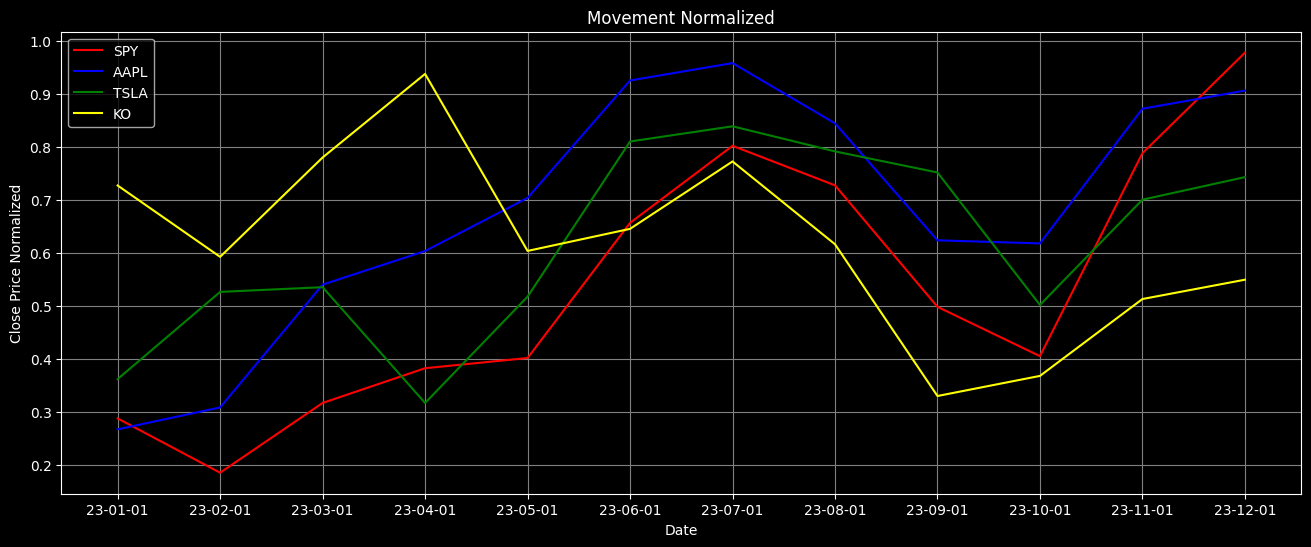

In [113]:
def plot_norm_moves(
    data_norm: pd.DataFrame,
    tickers:   list[str]  = ['show_all'],
    start:     str        = '1900-01-01',
    end:       str        = '2100-12-31',
    *,
    style:     str        = 'dark_background',
    figsize:   tuple[int] = (16, 6),
    use_price: str        = 'Close_norm',
    colors:    list[str]  = ['default'],
    legendloc: str | None = None
) -> None:

    """
    Plot the normalized price, can compare movements between assets if more than one ticker is given
    """

    # Declare variables
    if tickers == ['show_all']:
        tickers = data_norm.columns.get_level_values(0).unique()
    # Default color palette of 12 colors
    if colors == ['default']:
        colors = ['red', 'blue', 'green', 'yellow', 'magenta', 'cyan', 'purple', 'orange', 'lightblue', 'lightgreen', 'brown', 'gray']
    data_to_plot = data_norm.loc[start:end][tickers]
    data_to_plot.index = data_to_plot.index.strftime('%y-%m-%d')

    # Plot
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        plt.title('Movement Normalized')

        for i, tk in enumerate(tickers):
            plt.plot(data_to_plot[tk, use_price], color=colors[i % len(colors)], alpha=1, label=tk)

        plt.grid(which='major', color='grey')
        plt.xticks(np.arange(len(data_to_plot), step=max(len(data_to_plot) // 10, 1)))
        plt.xlabel('Date')
        plt.ylabel(f'{use_price.split("_")[0]} Price Normalized')
        plt.legend(loc=legendloc)
        plt.show()

plot_norm_moves(data_norm)

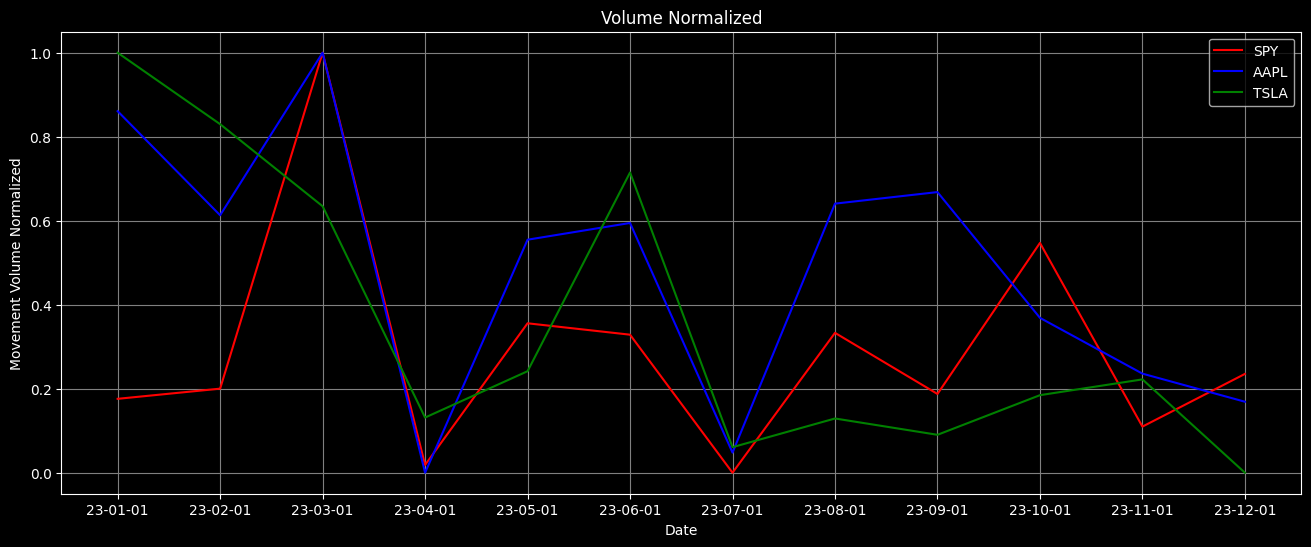

In [114]:
def plot_norm_vol(
    data_norm: pd.DataFrame,
    tickers:   list[str]  = ['first_three'],
    start:     str        = '1900-01-01',
    end:       str        = '2100-12-31',
    *,
    style:     str        = 'dark_background',
    figsize:   tuple[int] = (16, 6),
    colors:    list[str]  = ['red', 'blue', 'green'],
    legendloc: str | None = None
) -> None:

    """
    Plot movement of the volume normalized
    """
    if tickers == ['first_three']:
        tickers = returns.columns.get_level_values(0).unique()[:3]
    data_to_plot = data_norm.loc[start:end][tickers]
    data_to_plot.index = data_to_plot.index.strftime('%y-%m-%d')

    # Plot
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        plt.title('Volume Normalized')

        for ticker, color in zip(tickers, colors):
            plt.plot(data_to_plot[ticker, 'Volume_norm'], label=ticker, color=color)

        plt.grid(which='major', color='grey')
        plt.xticks(np.arange(len(data_to_plot), step=max(len(data_to_plot) // 10, 1)))
        plt.xlabel('Date')
        plt.ylabel('Movement Volume Normalized')
        plt.legend(loc=legendloc)
        plt.show()

plot_norm_vol(data_norm)

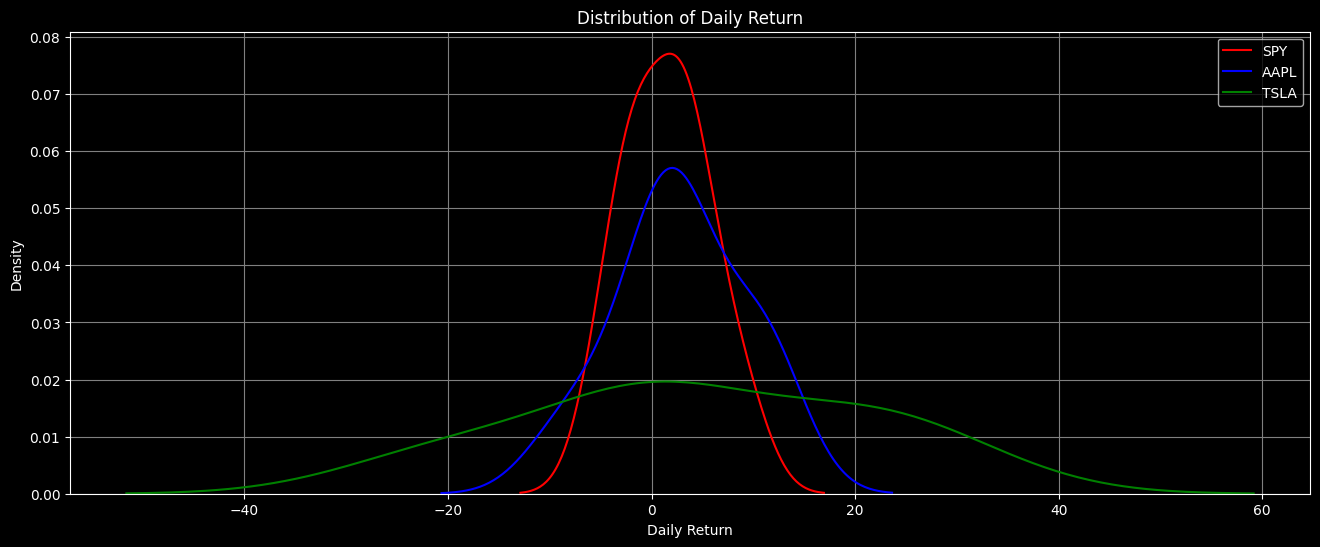

In [82]:
def plot_dist_ret(
    returns:  pd.DataFrame,
    tickers:  list[str]  = ['first_three'],
    start:    str        = '1900-01-01',
    end:      str        = '2100-12-31',
    *,
    style:    str        = 'dark_background',
    figsize:  tuple[int] = (16, 6),
    use_ret:  str        = 'Daily_ret',
    colors:   list[str]  = ['red', 'blue', 'green'],
    hist:     bool       = True,
    kde:      bool       = True
) -> None:

    """
    Docs, max of three tickers will be shown
    """

    if tickers == ['first_three']:
        tickers = returns.columns.get_level_values(0).unique()[:3]
    else:
        tickers = tickers[:3]
    data_to_plot = returns.loc[start:end][tickers]

    with plt.style.context(style):
        plt.figure(figsize=figsize)
        plt.title(f'Distribution of {use_ret.split("_")[0]} Return')

        for ticker, color in zip(tickers, colors):
            if hist:
                sns.histplot(data_to_plot[ticker,  use_ret], bins=50, color=color, edgecolor=None, alpha=0.5, kde=False, stat="density", zorder=2, label=ticker)
            if kde:
                sns.kdeplot(data_to_plot[ticker,  use_ret], color=color, zorder=2, label=ticker)

        plt.grid(which='major', color='grey', zorder=0)
        plt.xlabel(f'{use_ret.split("_")[0]} Return')
        plt.ylabel(f'Density')
        plt.legend()

        plt.show()

plot_dist_ret(returns, hist=False)

# Discard

In [83]:
# def get_minute(
#     data: pd.DataFrame,
#     *,
#     concat: bool = False,
#     place:  str  = 'beg'
# ) -> pd.DataFrame:

#     """
#     Creates a DataFrame with the week number of the year and you can concatenate it with the source DataFrame

#     ### Params
#     place: str='beg'
#         'beg' or 'end'

#     #### Returns DataFrame
#     """

#     var = 'Minute'

#     if concat and f'{var}' in data.columns.get_level_values(0).unique():
#         print(f'! - Already a column of first level named "{var}". No changes were made. - !')
#         return data

#     df = pd.DataFrame(index=data.index)
#     df[f'{var}'] = data.index.to_frame().iloc[:,0].dt.minute

#     if concat:
#         df.columns = pd.MultiIndex.from_arrays([[f'{var}'], ['Num']])
#         if place == 'end':
#             return pd.concat([data, df], axis=1)
#         return pd.concat([df, data], axis=1)
#     return df

# data_mod = get_minute(data_mod, concat=True)
# data_mod

In [84]:
# def get_hour(
#     data: pd.DataFrame,
#     *,
#     concat: bool = False,
#     place:  str  = 'beg'
# ) -> pd.DataFrame:

#     """
#     Creates a DataFrame with the week number of the year and you can concatenate it with the source DataFrame

#     ### Params
#     place: str='beg'
#         'beg' or 'end'

#     #### Returns DataFrame
#     """

#     var = 'Hour'

#     if concat and f'{var}' in data.columns.get_level_values(0).unique():
#         print(f'! - Already a column of first level named "{var}". No changes were made. - !')
#         return data

#     df = pd.DataFrame(index=data.index)
#     df[f'{var}'] = data.index.to_frame().iloc[:,0].dt.hour

#     if concat:
#         df.columns = pd.MultiIndex.from_arrays([[f'{var}'], ['Num']])
#         if place == 'end':
#             return pd.concat([data, df], axis=1)
#         return pd.concat([df, data], axis=1)
#     return df

# data_mod = get_hour(data_mod, concat=True)
# data_mod

In [85]:
# def get_weekday(
#     data: pd.DataFrame,
#     *,
#     concat: bool = False,
#     place:  str  = 'beg',
#     name:   bool = False,
#     num:    bool = True
# ) -> pd.DataFrame:

#     """
#     Creates a DataFrame with the number and name of the day of the week and you can concatenate it with the source DataFrame

#     ### Params
#     place: str='beg'
#         'beg' or 'end'

#     #### Returns DataFrame
#     """

#     var = 'Weekday'

#     if concat and f'{var}' in data.columns.get_level_values(0).unique():
#         print(f'! - Already a column of first level named "{var}". No changes were made. - !')
#         return data

#     df = pd.DataFrame(index=data.index)
#     if num:
#         df[f'{var}_Num'] = data.index.to_frame().iloc[:,0].dt.weekday + 1
#     if name:
#         df[f'{var}_Name'] = data.index.to_frame().iloc[:,0].dt.day_name()

#     if concat:
#         df.columns = pd.MultiIndex.from_product([[f'{var}'], [col.split('_')[1] for col in df.columns]])
#         if place == 'end':
#             return pd.concat([data, df], axis=1)
#         return pd.concat([df, data], axis=1)
#     return df

# data_mod = get_weekday(data_mod, concat=True)
# data_mod

In [86]:
# def get_dayofmonth(
#     data: pd.DataFrame,
#     *,
#     concat: bool = False,
#     place:  str  = 'beg'
# ) -> pd.DataFrame:

#     """
#     Creates a DataFrame with the week number of the year and you can concatenate it with the source DataFrame

#     ### Params
#     place: str='beg'
#         'beg' or 'end'

#     #### Returns DataFrame
#     """

#     var = 'Dayofmonth'

#     if concat and f'{var}' in data.columns.get_level_values(0).unique():
#         print(f'! - Already a column of first level named "{var}". No changes were made. - !')
#         return data

#     df = pd.DataFrame(index=data.index)
#     df[f'{var}'] = data.index.to_frame().iloc[:,0].dt.day

#     if concat:
#         df.columns = pd.MultiIndex.from_arrays([[f'{var}'], ['Num']])
#         if place == 'end':
#             return pd.concat([data, df], axis=1)
#         return pd.concat([df, data], axis=1)
#     return df

# data_mod = get_dayofmonth(data_mod, concat=True)
# data_mod

In [87]:
# def get_month(
#     data: pd.DataFrame,
#     *,
#     concat: bool = False,
#     place:  str  = 'beg',
#     name:   bool = False,
#     num:    bool = True
# ) -> pd.DataFrame:

#     """
#     Adds columns with the number and name of the month
#     """

#     var = 'Month'

#     if concat and f'{var}' in data.columns.get_level_values(0).unique():
#         print(f'! - Already a column of first level named "{var}". No changes were made. - !')
#         return data

#     df = pd.DataFrame(index=data.index)
#     if num:
#         df[f'{var}_Num']  = data.index.to_frame().iloc[:,0].dt.month
#     if name:
#         df[f'{var}_Name'] = data.index.to_frame().iloc[:,0].dt.month_name()

#     if concat:
#         df.columns = pd.MultiIndex.from_product([[f'{var}'], [col.split('_')[1] for col in df.columns]])
#         if place == 'end':
#             return pd.concat([data, df], axis=1)
#         return pd.concat([df, data], axis=1)
#     return df

# data_mod = get_month(data_mod, concat=True)
# data_mod

In [88]:
# def get_quarter(
#     data: pd.DataFrame,
#     *,
#     concat: bool = False,
#     place:  str  = 'beg'
# ) -> pd.DataFrame:

#     """
#     Creates a DataFrame with the week number of the year and you can concatenate it with the source DataFrame

#     ### Params
#     place: str='beg' or 'end'
#         'beg' or 'end'

#     #### Returns DataFrame
#     """

#     var = 'Quarter'

#     if concat and f'{var}' in data.columns.get_level_values(0).unique():
#         print(f'! - Already a column of first level named "{var}". No changes were made. - !')
#         return data

#     df = pd.DataFrame(index=data.index)
#     df[f'{var}'] = data.index.to_frame().iloc[:,0].dt.quarter

#     if concat:
#         df.columns = pd.MultiIndex.from_arrays([[f'{var}'], ['Num']])
#         if place == 'end':
#             return pd.concat([data, df], axis=1)
#         return pd.concat([df, data], axis=1)
#     return df

# data_mod = get_quarter(data_mod, concat=True)
# data_mod

In [89]:
# def get_year(
#     data:   pd.DataFrame,
#     *,
#     concat: bool = False,
#     place:  str  = 'beg'
# ) -> pd.DataFrame:

#     """
#     Adds a column with the year
#     """

#     var = 'Year'

#     if concat and f'{var}' in data.columns.get_level_values(0).unique():
#         print(f'! - Already a column of first level named "{var}". No changes were made. - !')
#         return data

#     df = pd.DataFrame(index=data.index)
#     df[f'{var}'] = data.index.to_frame().iloc[:,0].dt.year

#     if concat:
#         df.columns = pd.MultiIndex.from_arrays([[f'{var}'], ['Num']])
#         if place == 'end':
#             return pd.concat([data, df], axis=1)
#         return pd.concat([df, data], axis=1)
#     return df

# data_mod = get_year(data_mod, concat=True)
# data_mod